**Credit card fraud is a major concern, and this notebook explores fraud detection using machine learning. It covers data preprocessing, visualization, feature engineering, and model building to detect fraudulent transactions.**

1. pandas – For handling structured data (tables, CSV files, etc.).
2. numpy – For numerical computations and array manipulations.
3. matplotlib.pyplot – For creating static visualizations.
4. seaborn – Enhances visualizations, making them more informative.
5. statistics – Provides basic statistical functions.

Processing Libraries:
1. sklearn.metrics – Provides evaluation metrics like accuracy, precision-recall, and ROC curves.
2. sklearn.preprocessing – Includes StandardScaler for feature scaling.
3. sklearn.model_selection – Contains train_test_split and GridSearchCV for model tuning.
4. mpl_toolkits.mplot3d – Used for 3D plotting.
5. collections – Provides specialized data structures like Counter.
6. scipy.stats – Contains statistical functions such as uniform.

Machine Learning Models:
1. sklearn.manifold.TSNE – A dimensionality reduction technique for visualizing high-dimensional data.
2. sklearn.ensemble.RandomForestClassifier – A powerful tree-based model for classification.
3. sklearn.tree.DecisionTreeClassifier – A simple tree-based classifier.
4. sklearn.linear_model.Lasso – A regression model with L1 regularization.
5. sklearn.linear_model.LogisticRegression – A fundamental classification model.
6. xgboost – An optimized gradient boosting algorithm for structured data.
7. AdaBoostClassifier – Adaptive boosting for improving weak classifiers.
8. lightgbm – A fast, efficient boosting algorithm for large datasets.

In [54]:
# importing all the necessary libraries that I have used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Import processing libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve,average_precision_score, recall_score, precision_score, roc_curve, auc, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from scipy.stats import uniform


## Models
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

This dataset contains transactions made by credit cards in September 2013 by European cardholders. It is highly imbalanced, with fraudulent transactions being significantly fewer than legitimate ones.

Key Features:
1. Time: The seconds elapsed between the first transaction and the current transaction.
2. V1 to V28: These are anonymized features obtained using Principal Component Analysis (PCA) for privacy protection.
3. Amount: The transaction amount, which can be useful for fraud detection.
4. Class: The target variable where:
**0 = Legitimate transaction** **1 = Fraudulent transaction**

In [86]:
Credit_Card_DataFrame = pd.read_csv("A:/Github/Projects/Credit Card Project/DataSet/creditcard.csv")
Credit_Card_DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [87]:
# Describing the data
Credit_Card_DataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [88]:
# Understanding the columns
Credit_Card_DataFrame.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Ensuring there are no missing values is crucial for machine learning models, as missing data can negatively impact performance this dataset has no null values

In [89]:
# Checking if there are any null values that exist
Credit_Card_DataFrame.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This transformation allows for time-based analysis of fraudulent activities, helping identify patterns like fraud occurring at specific hours of the day as its difficult to understand the transction time in seconds when we are taking hours into consideration

In [90]:
#  Converting time in seconds to time in hrs
Credit_Card_DataFrame["Time"] = round((Credit_Card_DataFrame["Time"]/3600)%48)

Severe Class Imbalance

The dataset is dominated by non-fraudulent transactions (99.83%), while fraudulent transactions are extremely rare (0.17%).
This imbalance poses a challenge because most machine learning models tend to favor the majority class, leading to poor fraud detection.

Since fraud cases are significantly lower than normal transactions, the log scale on the y-axis makes these rare occurrences more visible in the plot.

If not treated correctly a model might achieve high overall accuracy but fail at detecting fraud, as it could simply classify everything as non-fraud (majority class).
Precision-Recall tradeoff is critical, as focusing solely on accuracy will not be useful in fraud detection.

Class
0    284315
1       492
Name: count, dtype: int64
Class 0 is: 99.83 % of the dataset
Class 1 is: 0.17 % of the dataset


C:\Users\reshu\AppData\Local\Temp\ipykernel_10940\3084781863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=Credit_Card_DataFrame, palette='pastel')


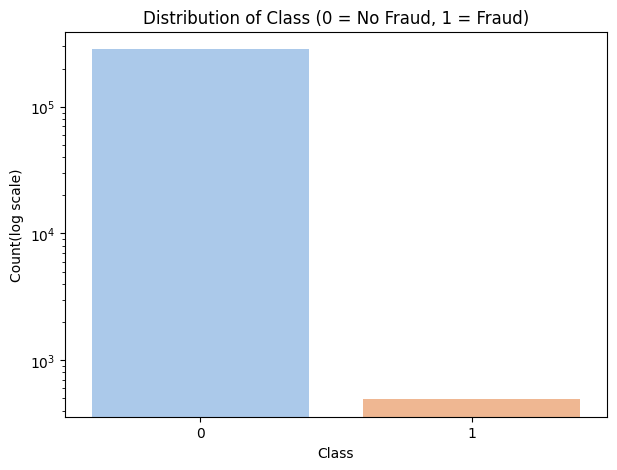

In [91]:
# Understanding the class distribution
Class_counts = Credit_Card_DataFrame["Class"].value_counts()
print(Class_counts)
print('Class 0 is:', round(Credit_Card_DataFrame['Class'].value_counts()[0]/len(Credit_Card_DataFrame) * 100,2), '% of the dataset')
print('Class 1 is:', round(Credit_Card_DataFrame['Class'].value_counts()[1]/len(Credit_Card_DataFrame) * 100,2), '% of the dataset')


# visualizing the imbalanced datasets
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=Credit_Card_DataFrame, palette='pastel')
plt.title('Distribution of Class (0 = No Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.yscale('log')  # we have done log since the values of the Non Fraud Classes were not visible so to make them clear in visualization we did this
plt.ylabel('Count(log scale)')
plt.show()

Fraudulent transactions are hidden within normal transactions, making it crucial to do feature Engineering, and Ensemble Learning to distinguish fraudulent behavior effectively
Fraud does not follow a clear pattern based on transaction amount.

The high presence of non-fraud cases in every range makes it harder for models to differentiate fraud from normal transactions.
Traditional classification models may struggle with learning patterns because fraud is sparsely distributed across the dataset.

In [92]:
# calculate the percentage of fraudulent transactions in different ranges 

bins = [0, 2, 4, 8, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, 50000] 
labels = ['0-2', '3-4','5-8', '9-10', '11-20', '21-50','51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
Credit_Card_DataFrame['Amount Range'] = pd.cut(Credit_Card_DataFrame['Amount'], bins=bins, labels=labels)

# calculate the counts of fraud in each amount range 
fraud_counts = Credit_Card_DataFrame.groupby('Amount Range')['Class'].value_counts().unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts

# display the percentage of in each amount range
print("Percentage of Fraudulent Transactions in Each Amount Range:")
print(fraud_counts)

Percentage of Fraudulent Transactions in Each Amount Range:
              Non-Fraud  Fraud
Amount Range                  
0-2               46084    172
3-4               13344     16
5-8               21655     25
9-10              17134      9
11-20             38844     22
21-50             51880     35
51-100            37198     56
101-200           27626     45
201-500           19645     50
501-1000           6176     26
1001-5000          2876      9
5001-10000           48      0
10001+                7      0


C:\Users\reshu\AppData\Local\Temp\ipykernel_10940\394783398.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = Credit_Card_DataFrame.groupby('Amount Range')['Class'].value_counts().unstack().fillna(0)


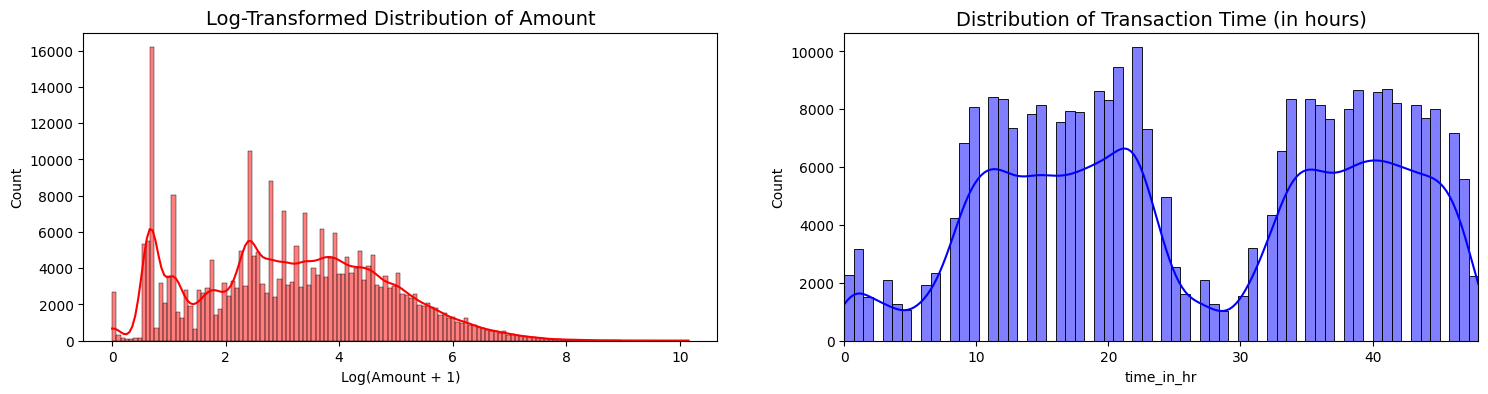

In [93]:
#Plotting the distribution to understand data visually since the dataset is so vast

data_copy = Credit_Card_DataFrame.copy()
amount_val = Credit_Card_DataFrame['Amount'].values

# Apply log transformation to 'Amount' to reduce skewness
log_amount_val = np.log1p(amount_val)
time_val = Credit_Card_DataFrame['Time']
data_copy['time_in_hr']=time_val
# Creating subplots
fig, ax1 = plt.subplots(1, 2, figsize=(18, 4))

# Plotting the distribution of 'Amount'
sns.histplot(log_amount_val, ax=ax1[0], color='r', kde=True)
ax1[0].set_title('Log-Transformed Distribution of Amount', fontsize=14)
ax1[0].set_xlabel('Log(Amount + 1)')

# Plotting the distribution of 'Time' (in hours)
sns.histplot(data_copy['time_in_hr'], ax=ax1[1], color='b', kde=True)
ax1[1].set_title('Distribution of Transaction Time (in hours)', fontsize=14)
ax1[1].set_xlim([min(data_copy['time_in_hr']), max(data_copy['time_in_hr'])])

# Show the plots
plt.show()

Text(0, 0.5, '# transactions')

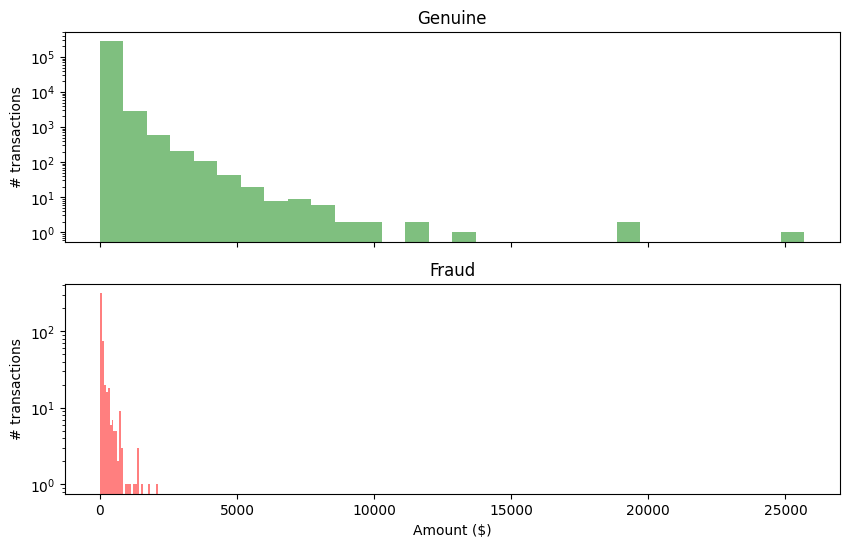

In [94]:
# plotting based on the amount

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(data_copy.Amount[data_copy.Class==0],bins=30,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(data_copy.Amount[data_copy.Class==1],bins=30,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

Fraud is Spread Throughout the Day

Fraudulent transactions occur in almost every time range, meaning fraud is not limited to a specific period.

The number of non-fraudulent transactions is significantly higher in all time ranges, making fraud detection challenging

Fraud follows no strict time pattern, making it difficult to predict based on time alone.

Fraudulent transactions are distributed across all time periods, making time-based detection alone insufficient.

In [95]:
# calculate the percentage of fraudulent transactions in different ranges 

labels = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'] 
bins = list(range(0, 25))
Credit_Card_DataFrame['Time Range'] = pd.cut(Credit_Card_DataFrame['Time'], bins=bins, labels=labels, right=False)

# calculate the counts of fraud in each amount range 
fraud_counts = Credit_Card_DataFrame.groupby('Time Range')['Class'].value_counts().unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts =  fraud_counts

# display the percentage of in each amount range
print("Percentage of Fraudulent Transactions in Each Amount Range:")
print(fraud_counts)

Percentage of Fraudulent Transactions in Each Amount Range:
            Non-Fraud  Fraud
Time Range                  
0-1              2259      2
1-2              3160      1
2-3              1491     21
3-4              2093     10
4-5              1246      5
5-6              1059     10
6-7              1910      7
7-8              2315     13
8-9              4235     16
9-10             6818      3
10-11            8045     15
11-12            8407     28
12-13            8349     19
13-14            7347     12
14-15            7839      7
15-16            8136     14
16-17            7530     17
17-18            7937     11
18-19            7894     11
19-20            8630     12
20-21            8303      8
21-22            9459     17
22-23           10140      3
23-24            7313      7


C:\Users\reshu\AppData\Local\Temp\ipykernel_10940\265184850.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = Credit_Card_DataFrame.groupby('Time Range')['Class'].value_counts().unstack().fillna(0)


Time variable


Text(0, 0.5, '# transactions')

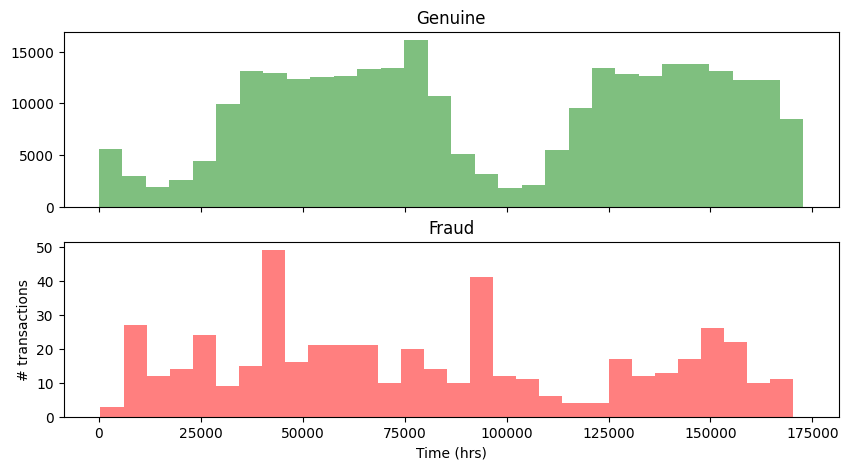

In [63]:
# plotting Time to see if there is any trend based on time

print("Time variable")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,5))
ax1.hist(data_copy.time_in_hr[data_copy.Class==0],bins=30,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data_copy.time_in_hr[data_copy.Class==1],bins=30,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [99]:
# Preprocessing & Applying TSNE

X = Credit_Card_DataFrame.drop(columns=["Class","Amount Range","Time Range"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])

In [11]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, n_iter=2500)
tsne_projection = tsne.fit_transform(X)

c:\Users\reshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
df_tsne = pd.DataFrame(tsne_projection, columns=['TSNE1', 'TSNE2'])
df_tsne['Class'] = Credit_Card_DataFrame['Class']  # Add fraud labels back

Fraudulent cases are not forming a distinct cluster but rather overlapping with normal transactions, making separation difficult.

The fraud cases blend into the majority class, showing that simple classifiers might struggle to differentiate them.

Feature Engineering: Adding new derived features could help separate fraud cases better.

The t-SNE plot confirms that fraudulent transactions are not easily separable from normal transactions, making fraud detection a challenging problem. 

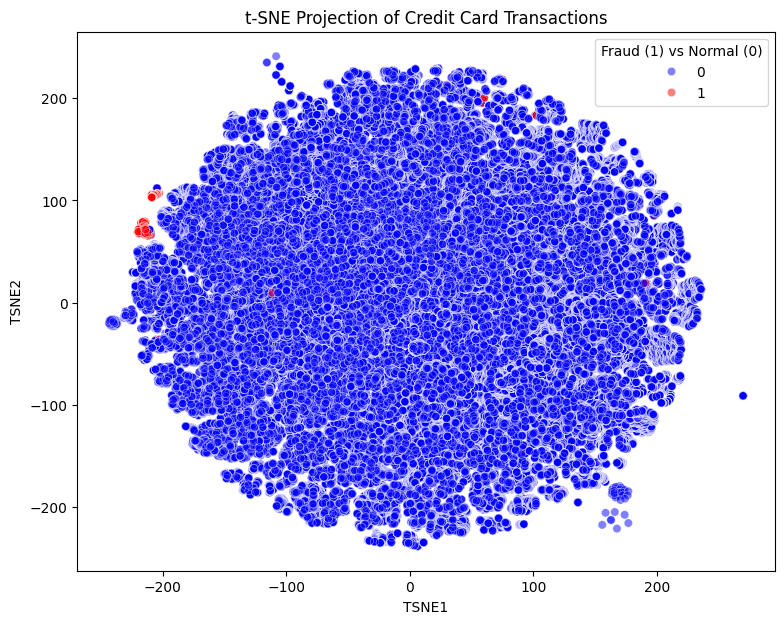

In [ ]:
plt.figure(figsize=(9, 7))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue=df_tsne['Class'], palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title("t-SNE Projection of Credit Card Transactions")
plt.legend(title="Fraud (1) vs Normal (0)")
plt.show()

As the data has undergone PCA so it removed all the correlation that existed between the features.

Also this data is sensitive real world data so to hide the user personal details PCA has been performed

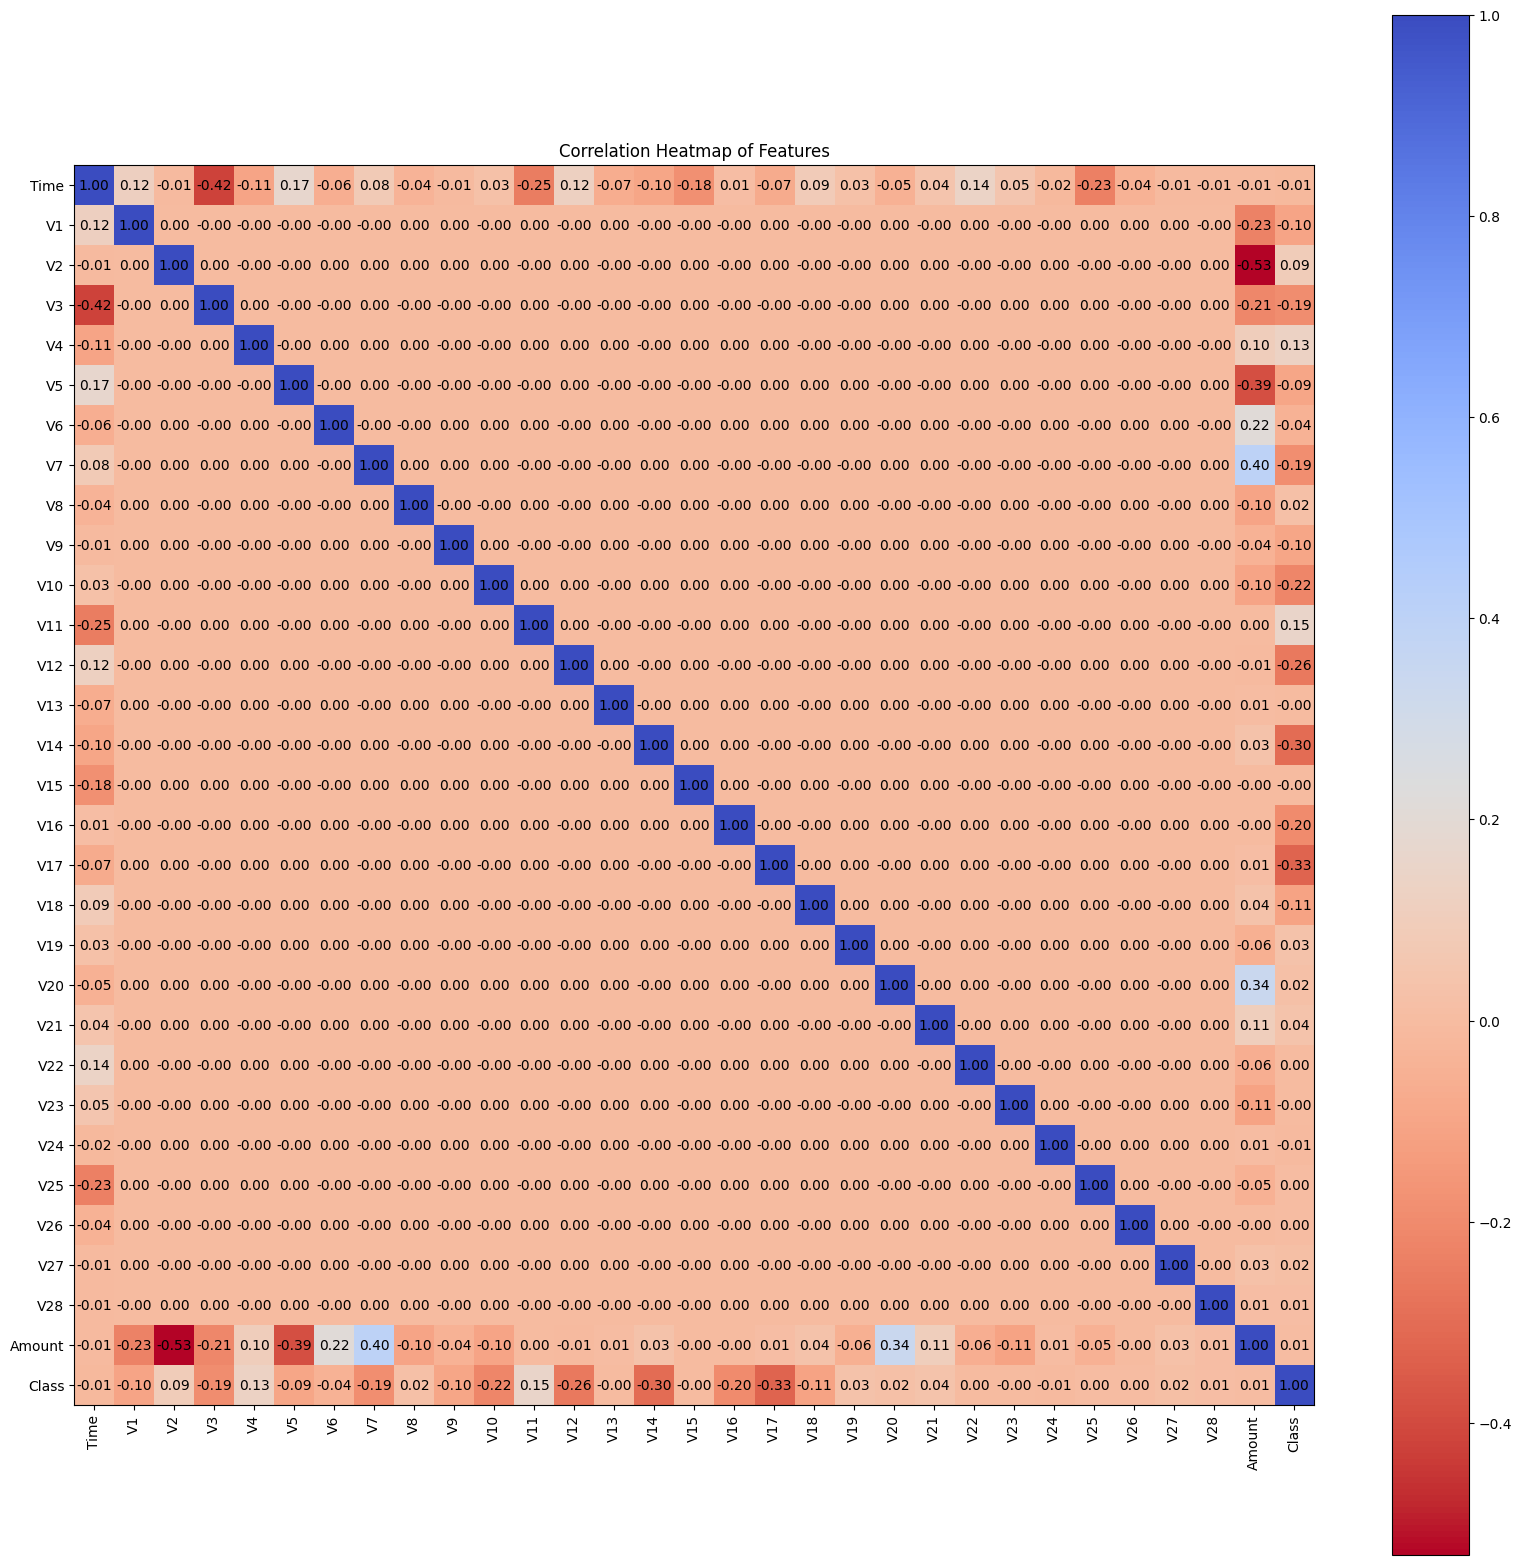

In [64]:
# Checking correlation if it exists

corr_matrix = Credit_Card_DataFrame.drop(columns=['Amount Range', 'Time Range']).corr()
plt.figure(figsize=(20, 20))
plt.imshow(corr_matrix, cmap='coolwarm_r', interpolation='nearest')
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color="black")

# Set the ticks to show column names
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Heatmap of Features')
plt.show()

* Skewness measures the asymmetry of the data distribution relative to a normal distribution.

The red dashed line represents zero skewness (perfect symmetry).
Observations:
Some PCA components exhibit high positive skewness, meaning they have a long right tail.
Other components show negative skewness, indicating a long left tail.
This suggests that some features are not normally distributed, which may affect model performance.



* This variance distribution suggests that the first few principal components (Time, V1-V7) are the most useful for distinguishing fraud from normal transactions.

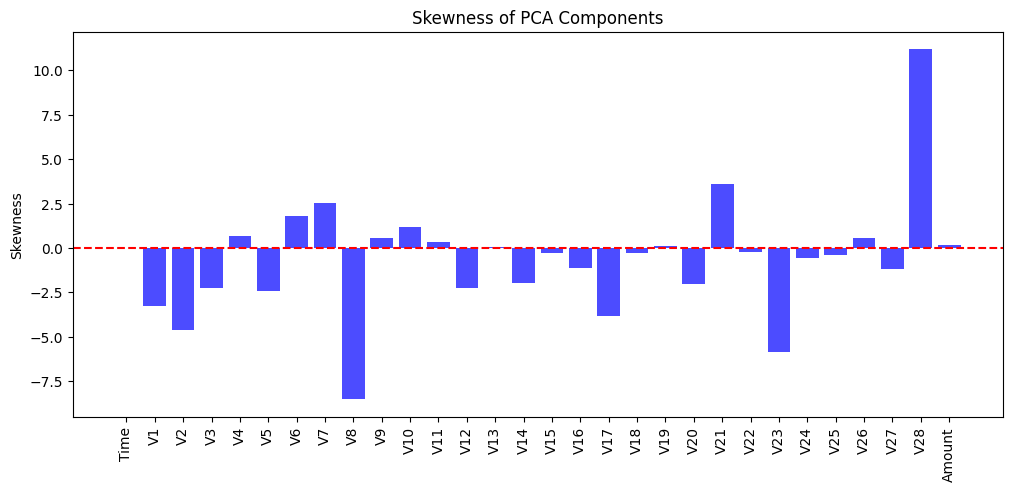

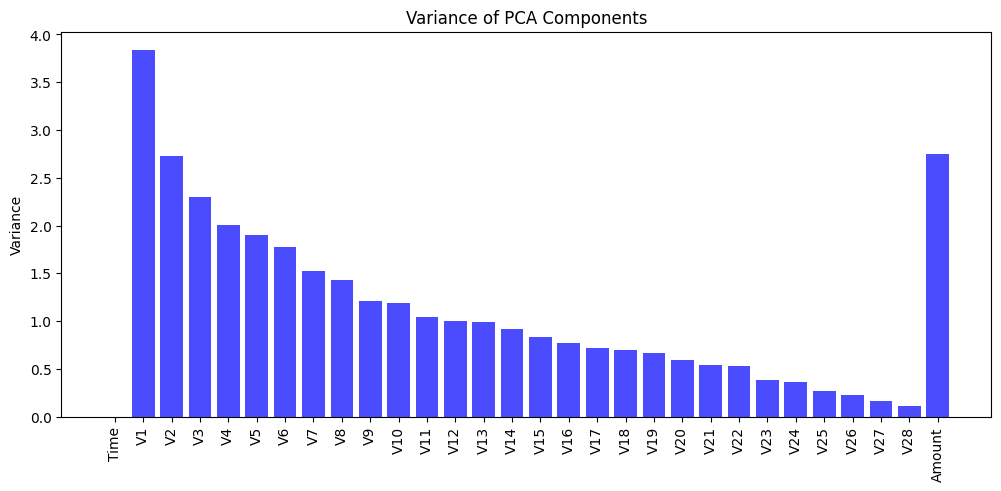

In [73]:
X = Credit_Card_DataFrame.drop(columns=["Class","Amount Range","Time Range"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])
X["Amount"] = np.log1p(Credit_Card_DataFrame["Amount"])
Skewness_Check = []
Variance_Check = []
for i in X.columns:
    Skewness_Check.append(X[i].skew())
    Variance_Check.append(X[i].var())

plt.figure(figsize=(12, 5))
plt.bar(X.columns, Skewness_Check, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='dashed')  # Reference line for normal distribution
plt.xticks(rotation=90)
plt.ylabel("Skewness")
plt.title("Skewness of PCA Components")
plt.show()


plt.figure(figsize=(12, 5))
plt.bar(X.columns, Variance_Check, color='blue', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Variance")
plt.title("Variance of PCA Components")
plt.show()